# Визуальный анализ

*Все задания выполняются только при помощи средств визуализации `Python`: `matplotlib`, `seaborn`, `pandas`, `plotly`. По каждому заданию должен быть сделан вывод. Для всех визуализаций используйте стиль `seaborn`. Обязательно добавляйте подпись графика и осей.* 

В этой практической работе вам предстоит провести визуальный анализ данных об особенностях жанров музыки. Датасет возьмите [отсюда](https://www.kaggle.com/vicsuperman/prediction-of-music-genre). Он содержит 41700 уникальных композиций.

Данные содержат 18 столбцов:
- `instance_id` - id строки датасета
- `artist_name` - исполнитель
- `track_name` - название трека
- `popularity` - индекс популярности трека
- `acousticness` - акустичность
- `danceability` - танцевальность (насколько трек подходит для танцев)
- `duration_ms` - длительность трека
- `energy` - энергичность трека
- `instrumentalness` - инструментальность
- `key` - регистр (высота тона)
- `liveness` - живость
- `loudness` - громкость
- `mode` - тональность
- `speechiness` - насколько много текста
- `tempo` - музыкальный темп
- `obtained_date` - дата загрузки трека в датасет
- `valence` - настроение
- `music_genre` - жанр

> **NB!** *Для выполнения задания возьмите 30 тысяч случайных строк из датасета.*

# Часть 1

In [25]:
db_link = 'https://raw.githubusercontent.com/IYunet/VIM-2022/main/2%20task/music_genre.csv'
!pip install ridgeplot
from ridgeplot import ridgeplot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.express as px


In [26]:
# формирование даных
data_frame = pd.read_csv(db_link)
data_frame = data_frame[data_frame.duration_ms > 0]
data_frame = data_frame.sample(n=30000, random_state=2002)


## Задание 1

Покажите, какие характеристики музыки коррелируют между собой. Сделайте выводы о корреляциях.

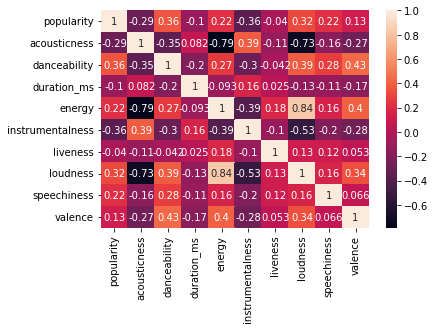

In [27]:
# Numeric columns of the dataset
numeric_col = ['popularity','acousticness','danceability','duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness','mode', 'speechiness', 'tempo', 'valence', 'music_genre']

# Correlation Matrix formation
corr_matrix = data_frame.loc[:,numeric_col].corr()

#Using heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True)

Наибольшая корреляция между energy и loudness 0.84, наименьшая корреляция между energy и acousticness - 0.79

## Задание 2

Покажите на диаграмме разброса три пары признаков, имеющих наибольшую отрицательную корреляцию.

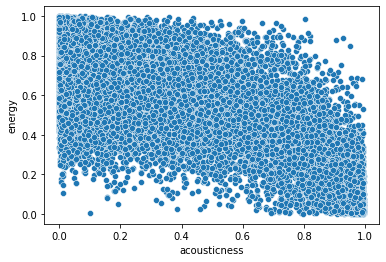

In [28]:
sns.scatterplot(x='acousticness', y='energy', data = data_frame)

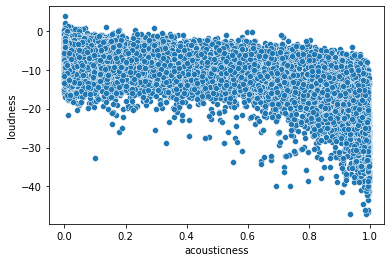

In [29]:
sns.scatterplot(x='acousticness', y='loudness', data = data_frame)

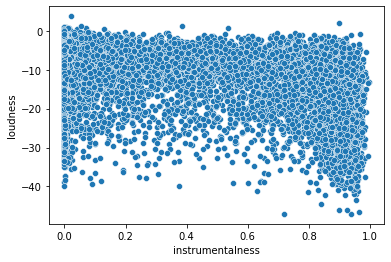

In [30]:
sns.scatterplot(x='instrumentalness', y='loudness', data = data_frame)

## Задание 3

Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.

Text(0, 0.5, 'count tracks in music genre')

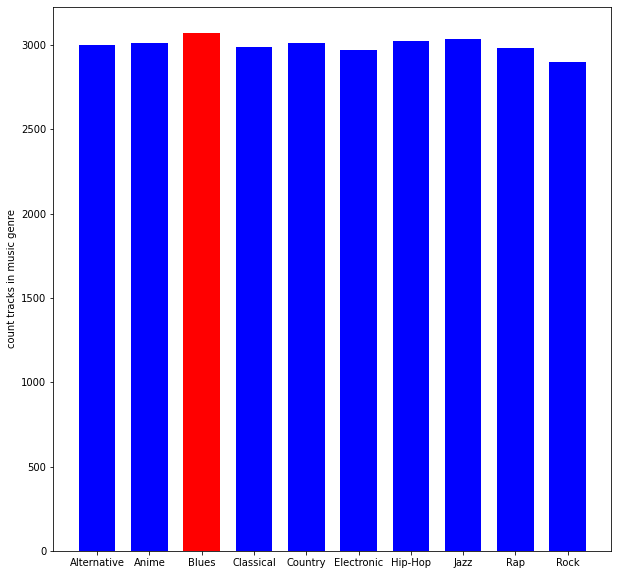

In [31]:
count_by_genrge = data_frame.groupby('music_genre').count().reset_index()

max1 = count_by_genrge.track_name.max()

col = []
for val in count_by_genrge.track_name:
  if val == max1:
    col.append('red')
  else:
    col.append('blue')
    
plt.figure(figsize=(10, 10))
plt.bar(x=count_by_genrge.music_genre, height=count_by_genrge.track_name, width=0.7, color = col)
plt.ylabel("count tracks in music genre")

## Задание 4

Для топ-3 жанров покажите на круговой диаграмме с группировкой топ-3 самых популярных исполнителей. Диаграмма должна быть одна.

In [32]:
top_3_genre = data_frame.groupby('music_genre').sum().reset_index().nlargest(3,'popularity')
music_with_top_3_genre = data_frame.loc[data_frame.music_genre.isin(top_3_genre.music_genre) & (data_frame.artist_name != 'empty_field')]
# сортировка артистов по жанрам
count_by_artis_rap = music_with_top_3_genre[music_with_top_3_genre.music_genre == 'Rap'].groupby(['artist_name','music_genre']).sum().reset_index()
count_by_artis_rock = music_with_top_3_genre[music_with_top_3_genre.music_genre == 'Rock'].groupby(['artist_name','music_genre']).sum().reset_index()
count_by_artis_hip = music_with_top_3_genre[music_with_top_3_genre.music_genre == 'Hip-Hop'].groupby(['artist_name','music_genre']).sum().reset_index()

# топ 3 артиста по жанру
top_3_artis_rap = count_by_artis_rap.nlargest(3,'popularity')
top_3_artis_rock = count_by_artis_rock.nlargest(3,'popularity')
top_3_artis_hip = count_by_artis_hip.nlargest(3,'popularity')

one_table = top_3_artis_rap.append(top_3_artis_rock).append(top_3_artis_hip)

fig = px.sunburst(one_table, path=['music_genre', 'artist_name'])
fig.show()

## Задание 5

На вертикальной столбиковой диаграмме для самого популярного и самого непопулярного жанров покажите средние значения по характеристикам. На одной диаграмме покажите 5 характеристик, в которых разница средних значений максимальна. На второй - в которых разница средних значений минимальна.

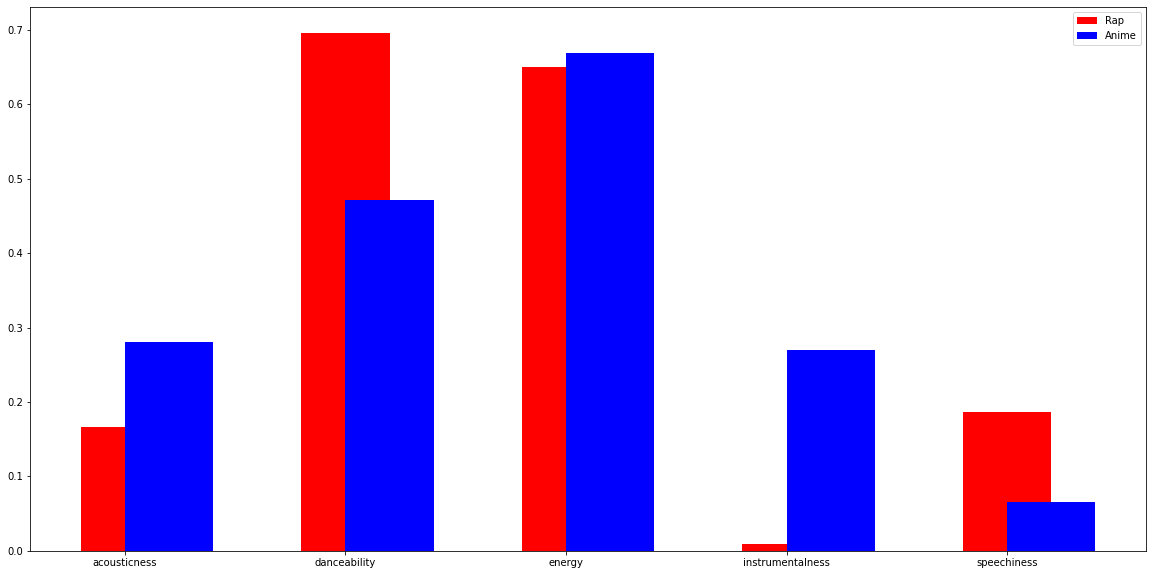

In [24]:
# самый поплярный и самый непопулярный жанр
most_popular_genre = data_frame.groupby('music_genre').sum().reset_index().nlargest(1,'popularity')
most_non_popular_genre = data_frame.groupby('music_genre').sum().reset_index().nsmallest(1,'popularity')

# подсчет среднего
mean_popular = data_frame.loc[data_frame.music_genre.isin(most_popular_genre.music_genre)].groupby("music_genre").mean().reset_index()
mean_not_popular = data_frame.loc[data_frame.music_genre.isin(most_non_popular_genre.music_genre)].groupby("music_genre").mean().reset_index()

# подсчет разницы
t1 = mean_popular.drop(columns=["music_genre", "duration_ms", "instance_id", "popularity","loudness"]) 
t2 = mean_not_popular.drop(columns=["music_genre", "duration_ms", "instance_id","popularity","loudness"])

# транспонирование
max_t1 = t1.transpose().reset_index()
min_t2 = t2.transpose().reset_index()

max_t1.columns = ['script','val']
min_t2.columns = ['script','val']

differents = abs(t1 - t2.iloc[0])
differents = differents.transpose().reset_index()
differents.columns = ['script','val']

# топ 5 разниц
max_5_diff = differents.nlargest(5, 'val')
min_5_diff = differents.nsmallest(5, 'val')

# наложение условий
filter_for_t1 = max_t1.loc[max_t1.script.isin(max_5_diff.script)]
filter_for_t2 = min_t2.loc[min_t2.script.isin(max_5_diff.script)]

# вывол обоих жанров, с учетом максимальной и мнимальной разницы
# графика для максимальной разницы
plt.figure(figsize=(20, 10))
plt.bar(x=filter_for_t1.script, height=filter_for_t1.val, width=0.4, color = 'red', label = 'Rap')
plt.bar(x=filter_for_t2.script, height=filter_for_t2.val, width=0.4, color = 'blue', align='edge', label = 'Anime')
plt.legend()

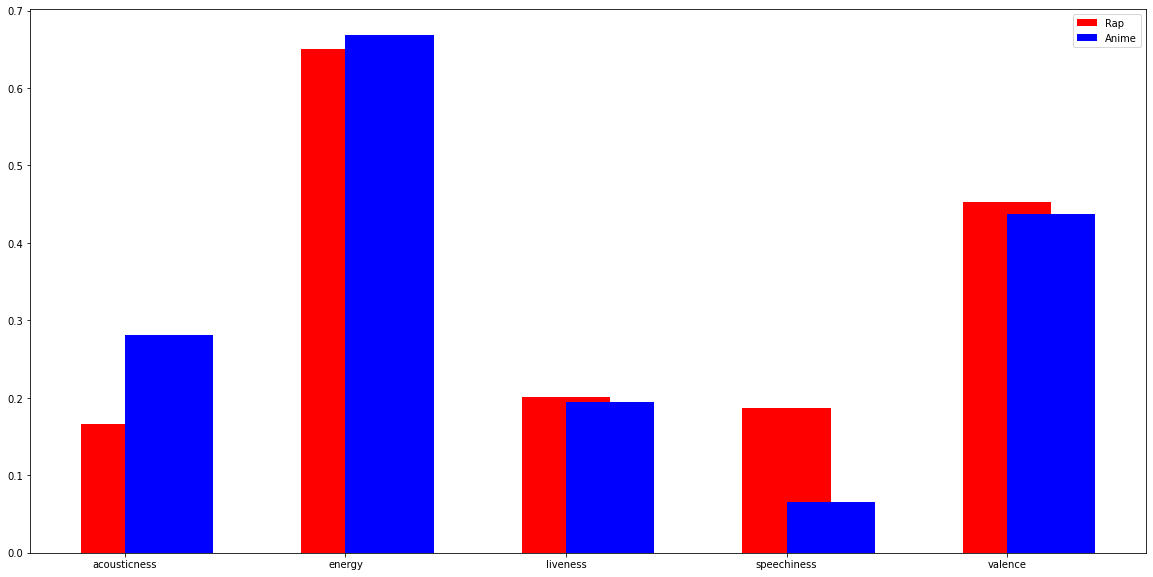

In [33]:
# наложение условий
filter_for_t1 = max_t1.loc[max_t1.script.isin(min_5_diff.script)]
filter_for_t2 = min_t2.loc[min_t2.script.isin(min_5_diff.script)]

# вывол обоих жанров, с учетом максимальной и мнимальной разницы
# графика для минимальной разницы
plt.figure(figsize=(20, 10))
plt.bar(x=filter_for_t1.script, height=filter_for_t1.val, width=0.4, color = 'red', label = 'Rap')
plt.bar(x=filter_for_t2.script, height=filter_for_t2.val, width=0.4, color = 'blue', align='edge', label = 'Anime')
plt.legend()

## Задание 6

Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая", "средняя", "длинная". Значения для каждой категории определите, исследовав данные в столбце `duration_ms`. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.

In [34]:
data_frame.duration_ms.mean() # medium

245150.9519

In [35]:
data_frame.duration_ms.max() # long

4830606.0

In [36]:
data_frame.duration_ms.min() # short

15509.0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



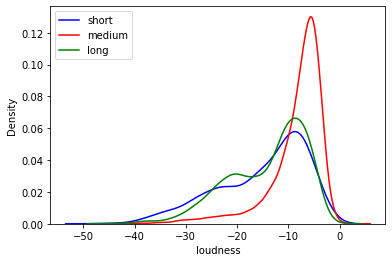

In [37]:
# short <= 120000 
# 120000 < medium <= 365000
# long > 365000
data_frame_new = data_frame.copy()

# создание столбца, с классификацией длительности трека
conditions = [(data_frame["duration_ms"] < 120000), 
              (data_frame["duration_ms"] > 365000), 
              (data_frame["duration_ms"] <= 365000) & (data_frame["duration_ms"] > 120000)]
values = ['short', 'long', 'medium']
data_frame_new["track_duration"] = np.select(conditions, values)

# наблюдаемые данные
data_short = data_frame_new.loc[data_frame_new.track_duration == 'short']
data_medium = data_frame_new.loc[data_frame_new.track_duration == 'medium']
data_long = data_frame_new.loc[data_frame_new.track_duration == 'long']

# график
sns.distplot(data_short['loudness'], color = 'blue', hist = False, kde = True, label = 'short')
sns.distplot(data_medium['loudness'], color = 'red', hist = False, kde = True, label = 'medium')
sns.distplot(data_long['loudness'], color = 'green', hist = False, kde = True, label = 'long')
plt.legend()


## Задание 7

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

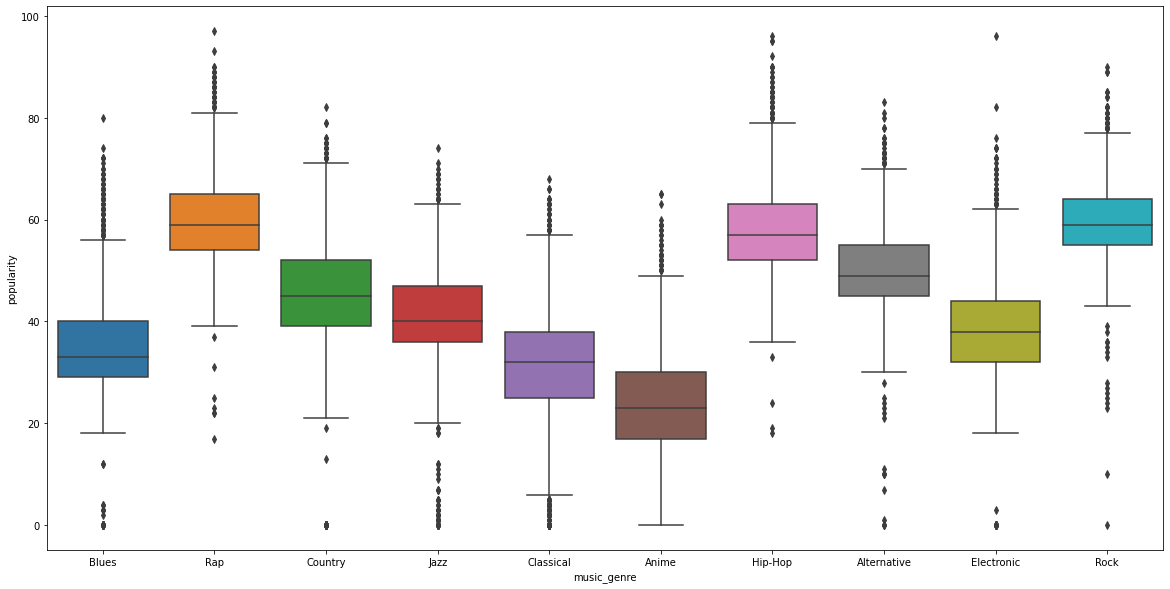

In [38]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=data_frame, x=data_frame['music_genre'], y=data_frame['popularity'])

 Rap, hip-hop, rock почти одинаковы по популярности
 

## Задание 8

На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности (для длительности используйте новый категориальный столбец, сформированный в задании 6).

In [39]:
# отбор данных
data_short = data_frame_new.loc[data_frame_new.track_duration == 'short'].groupby('track_duration').count().reset_index()
data_medium = data_frame_new.loc[data_frame_new.track_duration == 'medium'].groupby('track_duration').count().reset_index()
data_long = data_frame_new.loc[data_frame_new.track_duration == 'long'].groupby('track_duration').count().reset_index()

one_tab = data_short.append(data_medium).append(data_long)

#fig = px.pie(data_short, names=one_tab.track_duration, values=data_short.track_duration, labels='short', hole=.5)
#fig.show()



labels = ['short','medium','long']
values = [data_short.track_name, data_medium.track_name, data_long.track_name]

# Use `hole` to create a donut-like pie chart
fig = px.pie(one_tab, names=labels, values=one_tab.track_name, hole=0.5)
fig.show()

# Часть 2 (выполнение на R не обязательно)

Для второй части задания будем использовать другой датасет: о распределении Starbucks по всему миру. Датасет возьмем [отсюда](https://www.kaggle.com/starbucks/store-locations).

In [40]:
# подключение и настройка
link_2 = 'https://raw.githubusercontent.com/IYunet/VIM-2022/main/2%20task/directory.csv'
df_cofe = pd.read_csv(link_2)

## Задание 9

Покажите на карте количество кофеен в каждой стране, данные о которой есть в датасете.

In [41]:
# подготовка данных
df = pd.read_csv('https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv')

count_cofee_in_country = df_cofe.groupby('Country').count().reset_index()

tb1 = pd.DataFrame()
tb1['alpha-2'] = count_cofee_in_country['Country']
tb1['Count_in'] = count_cofee_in_country['Brand']
df = df.merge(tb1, on='alpha-2')

# графика
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=df['alpha-3'],
    z=df['Count_in'],
    colorscale='tealrose',
    colorbar_title="Number of cafes"
))

fig.update_geos(
    projection_type='natural earth'
    )
fig.show()

## Задание 10

Покажите на диаграмме вида treemap количество кофеен в каждой стране каждого региона мира, данные о которых есть в датасете. Страну подписывайте названием, а не ее кодом.

In [42]:
# соритровка по стране и региону в ней
df = pd.read_csv('https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv')
df = df.groupby(['name', 'alpha-2', 'alpha-3']).count().reset_index()
df = df.merge(tb1, on='alpha-2')
df = df.rename(columns = {'alpha-2' : 'Country'})
sort_by_c_r = df_cofe.groupby(['Country', 'State/Province']).count().reset_index()
sort_by_c_r = df.merge(sort_by_c_r)

fig = px.treemap(sort_by_c_r, path=[px.Constant('world'), 'name', 'State/Province'], values = 'Brand')
fig.show()